# Setup

In [1]:
from consav.runtools import write_numba_config
write_numba_config(disable=0,threads=20,threading_layer='omp')

In [2]:
import os
import time
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
colors = [x['color'] for x in plt.style.library['seaborn']['axes.prop_cycle']]
markers = ['s','P','D','v','^','*']

%load_ext autoreload
%autoreload 2

from consav.misc import elapsed
from TwoAssetModelCont import TwoAssetModelContClass

In [3]:
LOAD_A = True
LOAD_A_ALT = True
LOAD_B_POS = True
LOAD_B_NEG = True

# Function for testing

In [4]:
def test_grids(model,values,varname='Na',postfix='',load=False,do_print=True):
    
    momss = {}
    for value in values:
        
        # a. update
        model.name = f'grids_{varname}{value}{postfix}'
        setattr(model.par,varname,value)
        
        # b. solve
        print(f'{varname} = {value}')            
        if load and os.path.isfile(f'data\{model.name}_UMFPACK_par.p'):
            
            t0 = time.time()
            model = TwoAssetModelContClass(name=model.name,load=True)
            print(f'model loaded in {elapsed(t0)}')
            
            t0 = time.time()
            model.calculate_moments(do_MPC=True)
            print(f'moments calculated in {elapsed(t0)}')
            
            save = True
            
        else:
            
            if do_print:
                print('')
            
            model.solve(do_print=do_print)
            model.calculate_moments(do_MPC=True)
            save = True
            
            if do_print:        
                print('')

        # c. results
        print(f"A/Y: {model.moms['AY']:.4f}")
        print(f"K/Y: {model.moms['KY']:.4f}")
        print(f"B/Y: {model.moms['BY']:.4f}")
        print(f'percentiles of a:')
        for perc in [0.001,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99,0.999]:
            print(f" {perc:.3f}: {model.moms[('a',perc)]:.4f}")
        print(f'percentiles of b:')
        for perc in [0.001,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99,0.999]:
            print(f" {perc:.3f}: {model.moms[('b',perc)]:.4f}")            
        print(f"poor HTM: {model.moms['frac_b0_a0']:.4f} [{model.moms[('frac_b0_a0',0.01)]:.4f}]")
        print(f"wealthy HTM: {model.moms['frac_b0_apos']:.4f} [{model.moms[('frac_b0_apos',0.01)]:.4f}]")
        print(f"borrowers: {model.moms['frac_bneg']:.4f} [{model.moms[('frac_bneg',0.01)]:.4f}]")
        
        # d. save        
        model.moms['value'] = value
        if varname == 'Na':
            model.moms['label'] = f'$\#_a = {value}$'
        elif varname == 'Nb_neg':
            model.moms['label'] = f'$\#_{{b<0}} = {value}$'
        elif varname == 'Nb_pos':
            model.moms['label'] = f'$\#_{{b>0}} = {value}$'
        
        model.moms['par'] = model.get_par_dict()            
        momss[model.name] = model.moms.copy()
            
        if save:
            t0 = time.time()
            model.save()
            print(f'model saved in {elapsed(t0)}')
            
        print('')
        
    return momss

# Test grids

In [5]:
model = TwoAssetModelContClass()
model.solve(do_print=False) # test run (for timings)
Nas = [30,40,50,60,80,100,150,200,300,400,500]
momss_a = test_grids(model,Nas,load=LOAD_A,do_print=True)

Na = 30
model loaded in 15.9 secs
moments calculated in 9.9 secs
A/Y: 2.4572
K/Y: 1.8200
B/Y: 0.2823
percentiles of a:
 0.001: 0.0000
 0.050: 0.0000
 0.100: 0.0000
 0.250: 0.0000
 0.500: 0.0000
 0.750: 1.4842
 0.900: 17.4366
 0.950: 48.9016
 0.990: 262.6922
 0.999: 1203.4928
percentiles of b:
 0.001: -1.0000
 0.050: -0.5793
 0.100: -0.2232
 0.250: -0.0058
 0.500: 0.0008
 0.750: 1.0688
 0.900: 4.9881
 0.950: 9.7545
 0.990: 23.8256
 0.999: 35.4999
poor HTM: 0.2300 [0.2627]
wealthy HTM: 0.0652 [0.1516]
borrowers: 0.1479 [0.1356]
model saved in 0.0 secs

Na = 40
model loaded in 16.0 secs
moments calculated in 12.8 secs
A/Y: 2.9061
K/Y: 2.3364
B/Y: 0.2325
percentiles of a:
 0.001: 0.0000
 0.050: 0.0000
 0.100: 0.0000
 0.250: 0.0089
 0.500: 0.1431
 0.750: 3.5024
 0.900: 29.8232
 0.950: 74.4239
 0.990: 355.1091
 0.999: 1287.1244
percentiles of b:
 0.001: -1.0000
 0.050: -0.5649
 0.100: -0.2077
 0.250: -0.0057
 0.500: 0.0008
 0.750: 0.9522
 0.900: 4.5897
 0.950: 8.9392
 0.990: 22.2865
 0.999: 

In [6]:
model = TwoAssetModelContClass()
Nas_alt = [400,600,800,1200,1600,2000]
model.par.k_a = 0.45
momss_a_alt = test_grids(model,Nas_alt,postfix='_alt',load=LOAD_A_ALT,do_print=True)

Na = 400
model loaded in 18.1 secs
moments calculated in 2.0 mins 12 secs
A/Y: 4.1191
K/Y: 3.6467
B/Y: 0.1484
percentiles of a:
 0.001: 0.0000
 0.050: 0.0000
 0.100: 0.0000
 0.250: 0.0000
 0.500: 0.6658
 0.750: 15.3179
 0.900: 84.3958
 0.950: 171.5162
 0.990: 555.1301
 0.999: 1442.7271
percentiles of b:
 0.001: -1.0000
 0.050: -0.5324
 0.100: -0.1711
 0.250: -0.0051
 0.500: 0.0008
 0.750: 0.6107
 0.900: 3.6111
 0.950: 7.0140
 0.990: 17.3650
 0.999: 30.5665
poor HTM: 0.1053 [0.1459]
wealthy HTM: 0.1531 [0.3106]
borrowers: 0.1399 [0.1253]
model saved in 0.6 secs

Na = 600
model loaded in 18.7 secs
moments calculated in 3.0 mins 27 secs
A/Y: 4.2132
K/Y: 3.7453
B/Y: 0.1439
percentiles of a:
 0.001: 0.0000
 0.050: 0.0000
 0.100: 0.0000
 0.250: 0.0400
 0.500: 0.9288
 0.750: 17.3512
 0.900: 88.6628
 0.950: 176.6375
 0.990: 560.0797
 0.999: 1448.5424
percentiles of b:
 0.001: -1.0000
 0.050: -0.5267
 0.100: -0.1657
 0.250: -0.0051
 0.500: 0.0008
 0.750: 0.5815
 0.900: 3.5376
 0.950: 6.8720
 0.

In [7]:
model = TwoAssetModelContClass()
Nb_negs = [10,20,30,40,50,60,70]
model.par.Na = 200
momss_b_neg = test_grids(model,Nb_negs,varname='Nb_neg',load=LOAD_B_NEG,do_print=True)

Nb_neg = 10
model loaded in 18.8 secs
moments calculated in 1.0 mins 2 secs
A/Y: 4.0600
K/Y: 3.5837
B/Y: 0.1524
percentiles of a:
 0.001: 0.0000
 0.050: 0.0008
 0.100: 0.0059
 0.250: 0.0540
 0.500: 0.9162
 0.750: 15.2745
 0.900: 78.5467
 0.950: 160.6454
 0.990: 546.5171
 0.999: 1387.8219
percentiles of b:
 0.001: -1.0000
 0.050: -0.5288
 0.100: -0.1686
 0.250: -0.0051
 0.500: 0.0009
 0.750: 0.6156
 0.900: 3.6474
 0.950: 7.1327
 0.990: 17.8718
 0.999: 31.1264
poor HTM: 0.0002 [0.0848]
wealthy HTM: 0.2558 [0.3718]
borrowers: 0.1404 [0.1250]
model saved in 0.3 secs

Nb_neg = 20
model loaded in 19.1 secs
moments calculated in 1.0 mins 17 secs
A/Y: 4.0569
K/Y: 3.5803
B/Y: 0.1494
percentiles of a:
 0.001: 0.0000
 0.050: 0.0008
 0.100: 0.0061
 0.250: 0.0566
 0.500: 0.9480
 0.750: 15.4848
 0.900: 78.7711
 0.950: 160.3807
 0.990: 541.7822
 0.999: 1386.3550
percentiles of b:
 0.001: -0.9999
 0.050: -0.5136
 0.100: -0.1923
 0.250: -0.0086
 0.500: -0.0006
 0.750: 0.5858
 0.900: 3.6118
 0.950: 7.07

In [8]:
model = TwoAssetModelContClass()
Nb_poss = [40,60,80,100,120,160,200]
model.par.Na = 200
momss_b_pos = test_grids(model,Nb_poss,varname='Nb_pos',load=LOAD_B_POS,do_print=True)

Nb_pos = 40
model loaded in 20.2 secs
moments calculated in 1.0 mins 2 secs
A/Y: 4.0600
K/Y: 3.5837
B/Y: 0.1524
percentiles of a:
 0.001: 0.0000
 0.050: 0.0008
 0.100: 0.0059
 0.250: 0.0540
 0.500: 0.9162
 0.750: 15.2745
 0.900: 78.5467
 0.950: 160.6454
 0.990: 546.5171
 0.999: 1387.8219
percentiles of b:
 0.001: -1.0000
 0.050: -0.5288
 0.100: -0.1686
 0.250: -0.0051
 0.500: 0.0009
 0.750: 0.6156
 0.900: 3.6474
 0.950: 7.1327
 0.990: 17.8718
 0.999: 31.1264
poor HTM: 0.0002 [0.0848]
wealthy HTM: 0.2558 [0.3718]
borrowers: 0.1404 [0.1250]
model saved in 0.3 secs

Nb_pos = 60
model loaded in 20.5 secs
moments calculated in 1.0 mins 33 secs
A/Y: 4.0495
K/Y: 3.5726
B/Y: 0.1536
percentiles of a:
 0.001: 0.0000
 0.050: 0.0008
 0.100: 0.0059
 0.250: 0.0550
 0.500: 0.9232
 0.750: 15.3062
 0.900: 78.4269
 0.950: 160.0857
 0.990: 541.9610
 0.999: 1386.4388
percentiles of b:
 0.001: -1.0000
 0.050: -0.5163
 0.100: -0.1527
 0.250: -0.0021
 0.500: 0.0032
 0.750: 0.6835
 0.900: 3.7423
 0.950: 7.233

# Figures

## Convergence of CDFs

In [9]:
def plot_cdfs(momss,postfix):
        
    # a. illiquid
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_xscale('symlog')
    
    N = len(momss)
    
    for i,moms in enumerate(momss.values()):
        if i%2 == 0 and i > 3 and not i == N-1: continue
        par = moms['par']
        ax.plot(par['grid_a']*100,moms['a_margcum'],label=moms['label'])   
    
    ax.set_xlabel('$100 \cdot a_t$')
    ax.set_ylabel(f'CDF')
    ax.set_ylim([-0.01,1.01])
    ax.legend(frameon=True)
    
    fig.savefig(f'figs/CDF_a{postfix}.pdf')
    
    # b. liquid
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_xscale('symlog')
    
    for i,moms in enumerate(momss.values()):
        if i%2 == 0 and i > 3 and not i == N-1: continue
        par = moms['par']
        ax.plot(par['grid_b']*100,moms['b_margcum'],label=moms['label'])
        
    ax.set_xlabel('$100 \cdot b_t$')
    ax.set_ylabel(f'CDF')
    ax.set_ylim([-0.01,1.01])
    ax.legend(frameon=True)
    
    fig.savefig(f'figs/CDF_b{postfix}.pdf')
    
    plt.show()

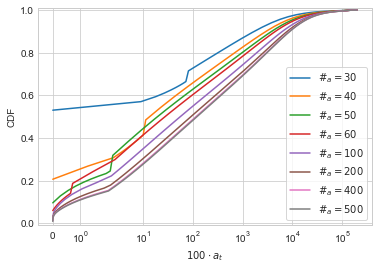

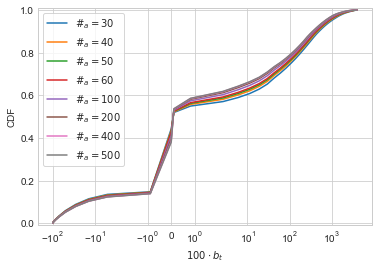

In [10]:
plot_cdfs(momss_a,postfix='_Na')

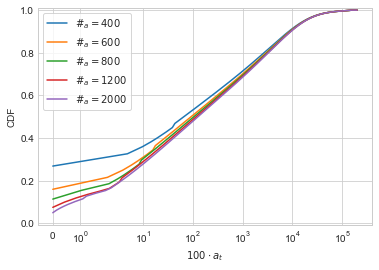

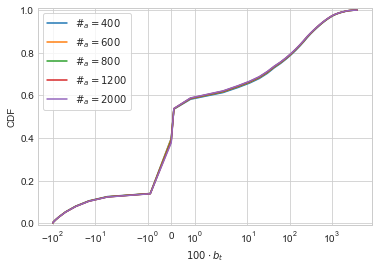

In [11]:
plot_cdfs(momss_a_alt,postfix='_Na_alt')

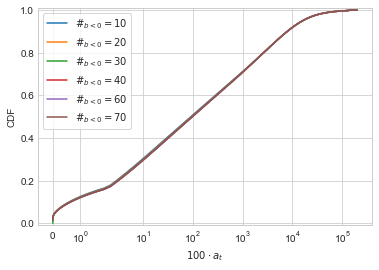

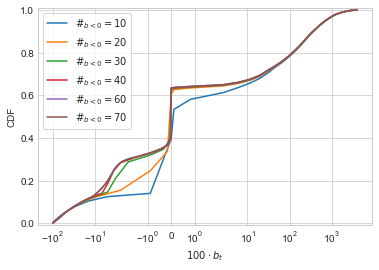

In [12]:
plot_cdfs(momss_b_neg,postfix='_Na_neg')

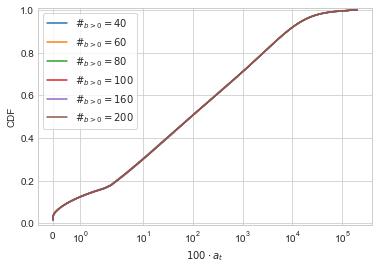

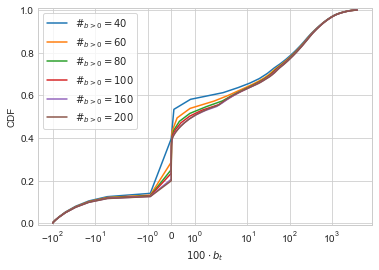

In [13]:
plot_cdfs(momss_b_pos,postfix='_Nb_pos')

## Convergence of selected moments

In [23]:
def plot_convergence(specs,momss,xlabel='',prefix='',momss_alt=None,HANK_xvalue=None):
    
    for momname,ylabel,HANK_value in specs:

        # a. unpack
        xvalues = [moms['value'] for moms in momss.values()]
        values = [moms[momname] for moms in momss.values()]
        if not momss_alt is None:
            xvalues_alt = [moms['value'] for moms in momss_alt.values()]
            values_alt = [moms[momname] for moms in momss_alt.values()]

        # b. figure
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        
        if not momss_alt is None:
            ax.plot(xvalues,values,'-o',label='$k_a = 0.15$')
            ax.plot(xvalues_alt,values_alt,'-o',label='$k_a = 0.45$')
        else:
            ax.plot(xvalues,values,'-o')
            
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        
        # c. HANK values           
        if not HANK_value is None:
            ax.axhline(HANK_value,color='black',label='HANK-value')
            if not HANK_xvalue is None:
                ax.axvline(HANK_xvalue,color='black')
            
        # d. details
        ax.legend(frameon=True)
                
        if type(momname) is tuple:
            momname_ = momname[0]
        else:
            momname_ = momname
            
        if momname_ == 'AY':
            ax.set_ylim([2,4.5])
        elif momname_ == 'BY':
            ax.set_ylim([0.1,0.3])
        elif momname_ == 'MPC':
            ax.set_ylim([0.0,0.3])
        elif momname_ in ['frac_b0_a0','frac_b0_apos','frac_bneg']:
            ax.set_ylim([-0.01,0.5])

        # e. print
        fig.tight_layout()        
        if type(momname) is tuple:
            fig.savefig(f'figs/conv{prefix}_{momname[0]}_{momname[1]}.pdf')
        else:
            fig.savefig(f'figs/conv{prefix}_{momname}.pdf')
    

In [24]:
specs = [('AY','mean illiquid assets',2.93),
         ('BY','mean liquid assets',0.23),
         ('frac_b0_a0','poor hands-to-mouth share',0.10),
         ('frac_b0_apos','wealthy hands-to-mouth share',0.19),
         ('frac_bneg','borrower share',0.15),
         (('frac_b0_a0',0.01),'poor hands-to-mouth share (robust)',0.10),
         (('frac_b0_apos',0.01),'wealthy hands-to-mouth share (robust)',0.19),
         (('frac_bneg',0.01),'borrower share (robust)',0.15),
         ('MPC','MPC',0.16),
         ('HJB','secs to solve HJB',None),
         ('KFE','secs to solve KFE',None)]

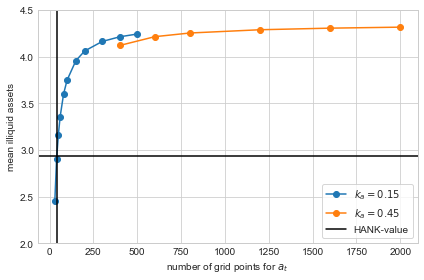

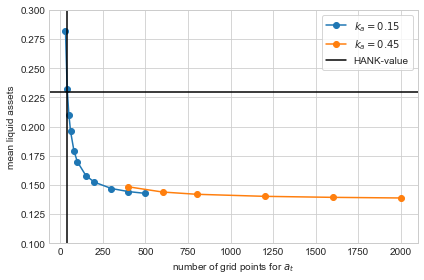

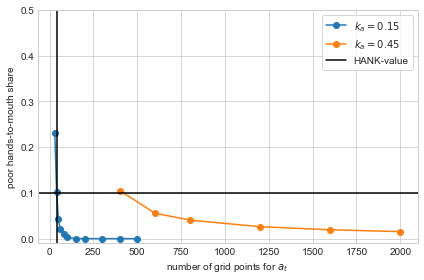

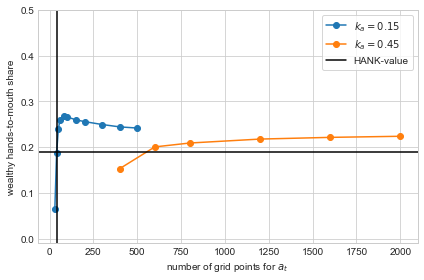

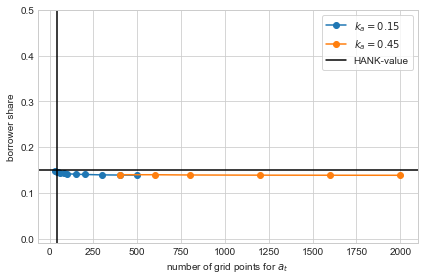

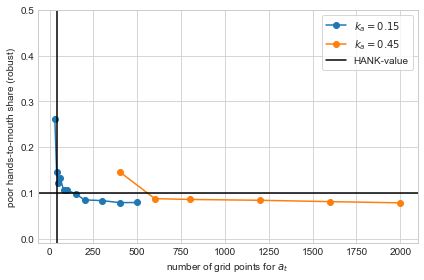

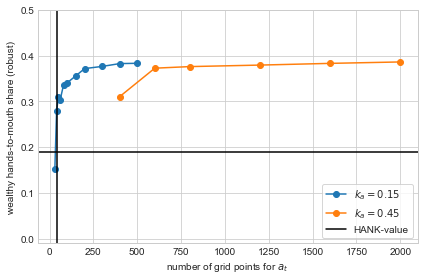

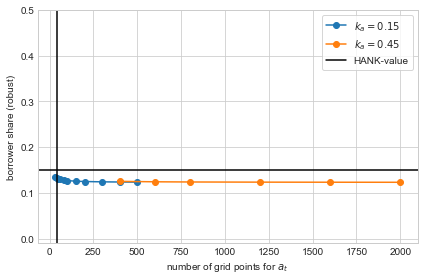

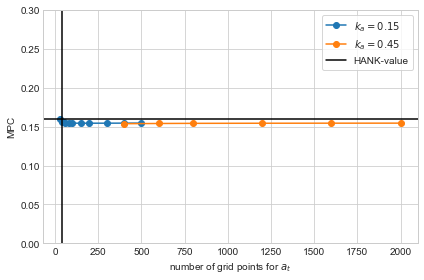

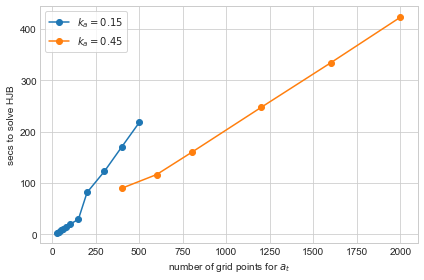

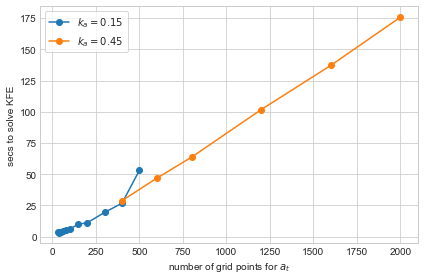

In [25]:
plot_convergence(specs,momss_a,xlabel='number of grid points for $a_t$',prefix='_Na',momss_alt=momss_a_alt,HANK_xvalue=40)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


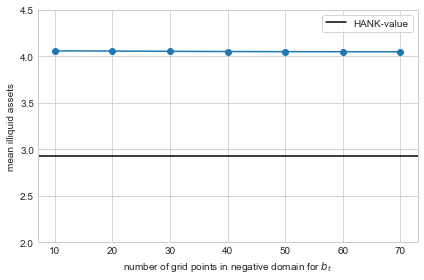

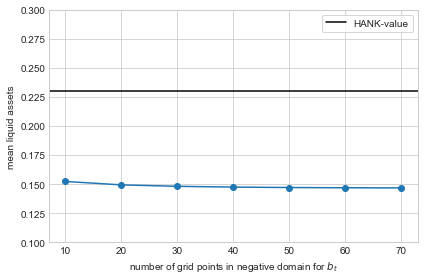

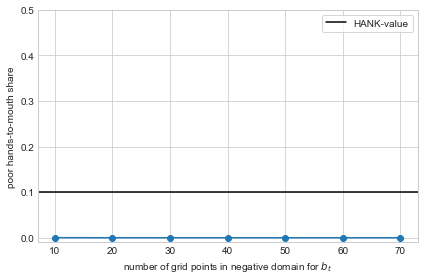

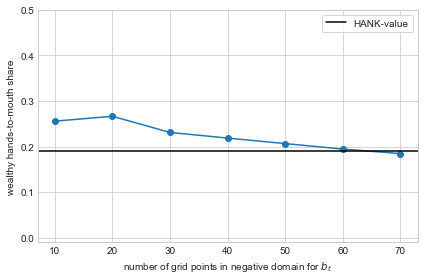

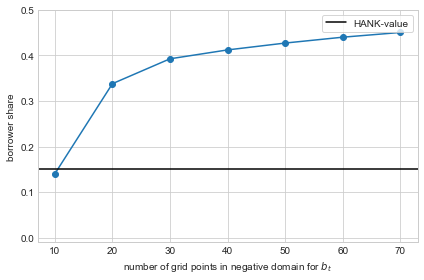

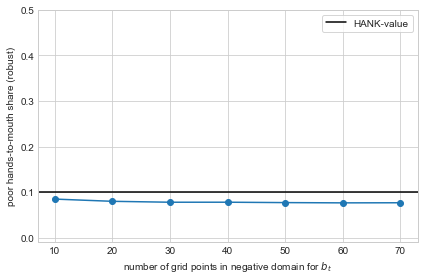

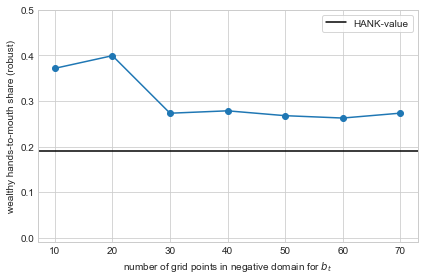

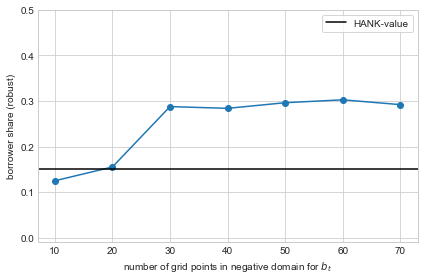

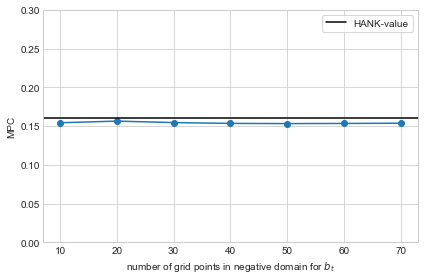

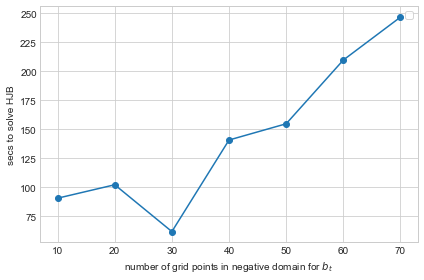

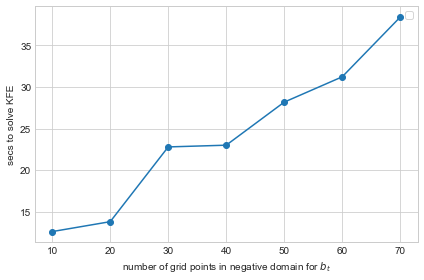

In [26]:
plot_convergence(specs,momss_b_neg,xlabel='number of grid points in negative domain for $b_t$',prefix='_Nb_neg')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


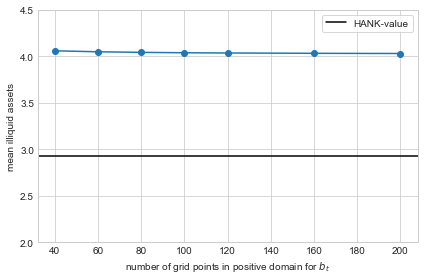

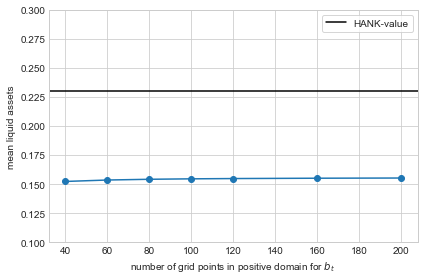

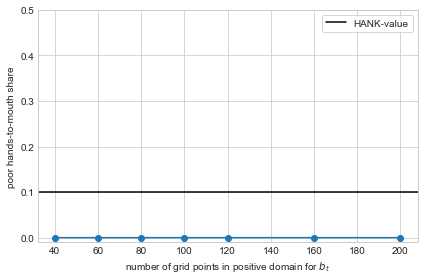

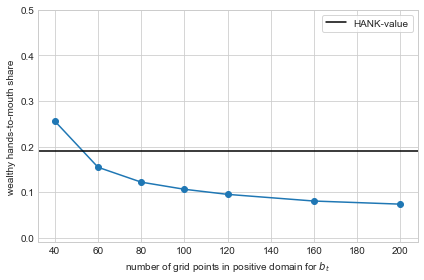

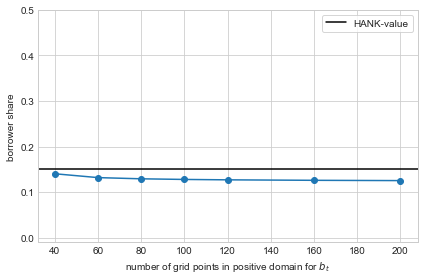

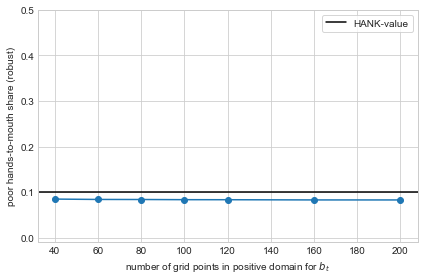

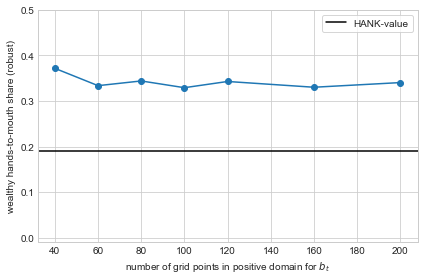

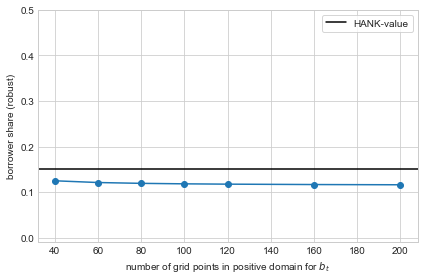

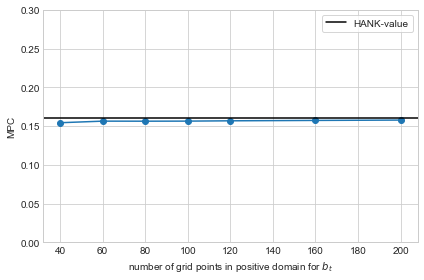

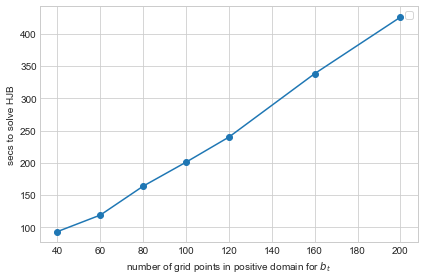

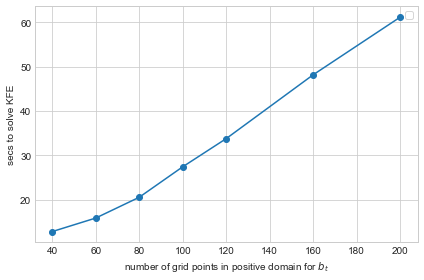

In [27]:
plot_convergence(specs,momss_b_pos,xlabel='number of grid points in positive domain for $b_t$',prefix='_Nb_pos')

## Grids

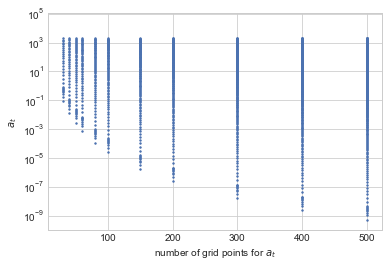

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')

for moms in momss_a.values():
    
    grid = moms['par']['grid_a']
    N = grid.size
    ax.scatter(N*np.ones(N-1),grid[1:],color=colors[0],s=2)
    
ax.set_xlabel('number of grid points for $a_t$')
ax.set_ylabel(f'$a_t$')

fig.savefig(f'figs/grid_a.pdf')

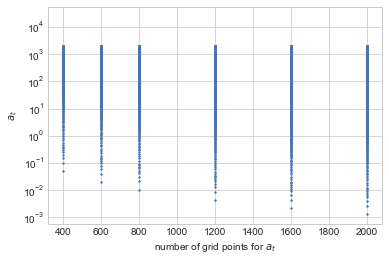

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')

for moms in momss_a_alt.values():
    
    grid = moms['par']['grid_a']
    N = grid.size
    ax.scatter(N*np.ones(N-1),grid[1:],color=colors[0],s=2)
    
ax.set_xlabel('number of grid points for $a_t$')
ax.set_ylabel(f'$a_t$')

fig.savefig(f'figs/grid_a_alt.pdf')

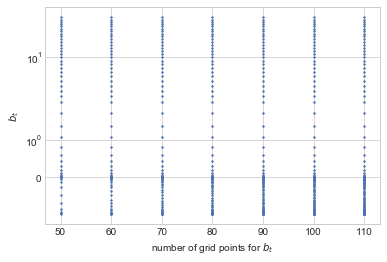

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('symlog')

for moms in momss_b_neg.values():
    
    grid = moms['par']['grid_b']
    N = grid.size
    ax.scatter(N*np.ones(N),grid,color=colors[0],s=2)
    
ax.set_xlabel('number of grid points for $b_t$')
ax.set_ylabel(f'$b_t$')

fig.savefig(f'figs/grid_b_neg.pdf')

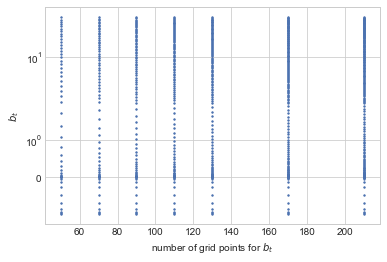

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('symlog')

for moms in momss_b_pos.values():
    grid = moms['par']['grid_b']
    N = grid.size
    ax.scatter(N*np.ones(N),grid,color=colors[0],s=2)
    
ax.set_xlabel('number of grid points for $b_t$')
ax.set_ylabel(f'$b_t$')

fig.savefig(f'figs/grid_b_pos.pdf')